##Training Data Cleaning
Section Details:
1. Reading and exploring the data
2. Removing missing values, if any, and ensuring all sequences are in uppercase
3. Filtering based on sequence length
4. Filtering based on whether amino acids are valid
5. Dropping duplicates
6. Checking distribution of class labels, and balancing using smote
7. Filtering out Low Complexity Regions

In [ ]:
# packages to be installed
!pip install biopython
!pip install imbalanced-learn
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.7 MB/s eta 0:00:00


In [ ]:
# importing required libraries
from Bio import SeqIO
import pandas as pd
import numpy as np

def load_fasta_data(fasta_file):
    sequences = []
    labels = []

    # Parsing the FASTA file
    for record in SeqIO.parse(fasta_file, "fasta"):
        header = record.description
        sequence = str(record.seq)

        # Extracting labels from the header(1 for positive, 0 for negative)
        if 'label_1' in header:
            label = 1
        elif 'label_0' in header:
            label = 0
        else:
            continue

        # Append the sequence and label to the list
        sequences.append(sequence)
        labels.append(label)

    return sequences, labels

sequences,labels=load_fasta_data("Train.fasta")
print(len(sequences))
print(len(labels))

53285
53285


In [ ]:
#Method to drop entries with missing values

def drop_missing_values(sequences, labels):
    df = pd.DataFrame({'Sequence': sequences, 'Label': labels})

    # Drop rows where 'Sequence' or 'Label' is missing
    df = df.dropna(subset=['Sequence', 'Label']).reset_index(drop=True)

    # Convert back to lists
    filtered_sequences = df['Sequence'].tolist()
    filtered_labels = df['Label'].tolist()

    return filtered_sequences, filtered_labels

sequences, labels = drop_missing_values(sequences, labels)

#To ensure all the sequences are in upper case
def standardize_case(sequences, labels):
    standardized_sequences = [seq.upper() for seq in sequences]
    return standardized_sequences, labels


sequences, labels = standardize_case(sequences, labels)

print(len(sequences))
print(len(labels))

53285
53285


In [ ]:
#According to the README document, amino acid sequences should be of length 50-3000. However, there are outliers in the dataset. Hence filtering them out

def filter_sequences(sequences, labels):
  filtered_sequences = []
  filtered_labels = []
  for i in range(len(sequences)):
    if(len(sequences[i])>=50 and len(sequences[i])<=3000):
      filtered_sequences.append(sequences[i])
      filtered_labels.append(labels[i])
  return filtered_sequences, filtered_labels

sequences,labels=filter_sequences(sequences,labels)
print(len(sequences))
print(len(labels))

53262
53262


In [ ]:
"""
#NO NEED TO RUN THIS CODE CHUNK
def letters_used(seq,letter):

  for item in seq:
    for i in range (len(item)):
      if item[i]==letter:
        return True #returns True if the letter is used in any of the sequences throughout
  return False #returns False if the letter is not used at all

letter_test=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
result=[]
for let in letter_test:
  result.append(letters_used(sequences,let))
print(result)
#The following letters are not used: B,J,O,Z. However, there should only be 20 letters used. U and X have been used in the train.fasta file even though they should not be.
#One more filter must be made. To generalize the filter, we will remove all instances of the 6 letters that should not be there. This will save us from running the letters_used() method again
"""

"\n#NO NEED TO RUN THIS CODE CHUNK\ndef letters_used(seq,letter):\n\n  for item in seq:\n    for i in range (len(item)):\n      if item[i]==letter:\n        return True #returns True if the letter is used in any of the sequences throughout\n  return False #returns False if the letter is not used at all\n\nletter_test=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']\nresult=[]\nfor let in letter_test:\n  result.append(letters_used(sequences,let))\nprint(result)\n#The following letters are not used: B,J,O,Z. However, there should only be 20 letters used. U and X have been used in the train.fasta file even though they should not be.\n#One more filter must be made. To generalize the filter, we will remove all instances of the 6 letters that should not be there. This will save us from running the letters_used() method again\n"

In [ ]:
#Instead of just removing the invalid letters, we will also check for all non-standard characters

def remove_non_standard(seq):
  uppercase_letters = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W','Y']
  for i in seq:
    if i not in uppercase_letters:
      return False
  return True

def remove_non(seq,lab):
  res_seq=[]
  res_lab=[]
  for i in range(len(seq)):
    if remove_non_standard(seq[i])==True:
      res_seq.append(seq[i])
      res_lab.append(lab[i])
  return res_seq,res_lab

sequences,labels=remove_non(sequences,labels)
print(len(sequences))
print(len(labels))

53238
53238


In [ ]:
import pandas as pd

def remove_duplicates(sequences, labels):
    # Convert sequences and labels into a DataFrame
    df = pd.DataFrame({'Sequence': sequences, 'Label': labels})

    # Drop duplicate rows
    df = df.drop_duplicates()

    # Convert back to lists
    return df['Sequence'].tolist(), df['Label'].tolist()

sequences, labels = remove_duplicates(sequences, labels)
print(len(sequences))
print(len(labels))

53238
53238


In [ ]:
#Checking distribution of labels
import pandas as pd

def check_label_distribution(sequences, labels):
    df = pd.DataFrame({'Sequence': sequences, 'Label': labels})

    # Count occurrences of each label
    class_counts = df['Label'].value_counts()

    # Extract counts for each class
    negatives = class_counts.get(0, 0)  # Count of label_0 (non-DNA binding proteins)
    positives = class_counts.get(1, 0)  # Count of label_1 (DNA binding proteins)

    # Calculate the ratio between positive and negative classes
    if negatives != 0:
        ratio = positives / negatives
        print(f"Number of Negative Class (label_0): {negatives}")
        print(f"Number of Positive Class (label_1): {positives}")
        print(f"Ratio (Positive:Negative) = {round(ratio, 2)}")
    else:
        print(f"Number of Negative Class (label_0): {negatives}")
        print(f"Number of Positive Class (label_1): {positives}")
        print(f"Ratio (Positive:Negative) = Undefined (no negatives)")

    # Define class weights for handling class imbalance
    class_weights = {0: 1.0, 1: 1.98}  # Adjust the weight based on imbalance

    # Calculate class priors
    total = negatives + positives
    if total > 0:
        class_priors = [negatives / total, positives / total]
    else:
        class_priors = [0, 0]  # Default if no data is provided

    print(f"Class Priors: {class_priors}")

    # Return values for further use
    return {"class_counts": class_counts, "class_weights": class_weights, "class_priors": class_priors}

distribution_info = check_label_distribution(sequences, labels)


Number of Negative Class (label_0): 35409
Number of Positive Class (label_1): 17829
Ratio (Positive:Negative) = 0.5
Class Priors: [0.6651076298884255, 0.33489237011157447]


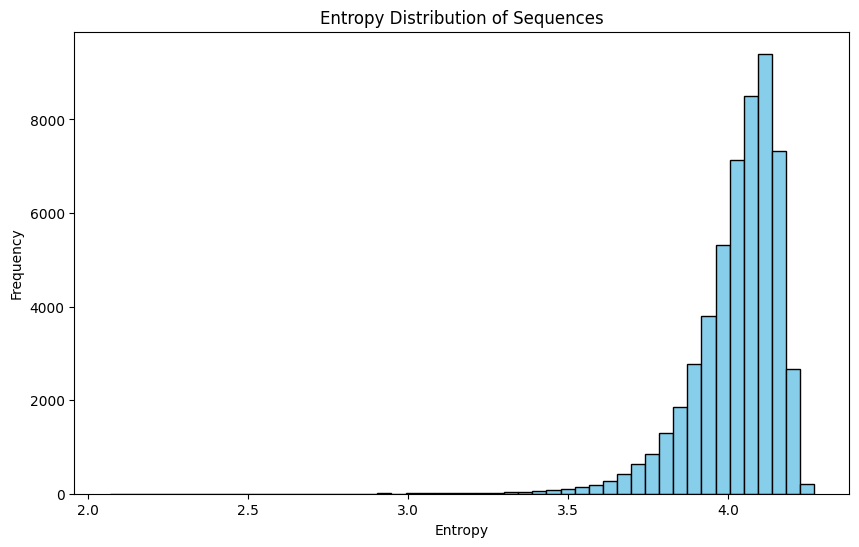

Minimum Entropy Value: 2.069


'\nBased on the graph, the entropy of all the sequences is relatively high.\nThe standard threshold is usually taken as 1.5. The lowest entropy in our dataset is 2.069.\nBased on that threshold, none of the sequences have low complexity regions.\nTherefore, filtering based on low complexity regions is not required.\n'

In [ ]:
#Filtering out low complexity sequences

#Using Shannon entropy to find low complexity sequences since they can lead to false positives or overfitting
import numpy as np
from math import log2
import matplotlib.pyplot as plt

def analyze_low_complexity_sequences(sequences):
    # Function to calculate Shannon entropy of a sequence
    def calculate_entropy(sequence):
        freqs = {char: sequence.count(char) / len(sequence) for char in set(sequence)}
        return -sum(p * log2(p) for p in freqs.values())

    # Calculate entropy for each sequence
    entropy_values = [calculate_entropy(seq) for seq in sequences]

    # Plot histogram of entropy values
    plt.figure(figsize=(10, 6))
    plt.hist(entropy_values, bins=50, color='skyblue', edgecolor='black')
    plt.title("Entropy Distribution of Sequences")
    plt.xlabel("Entropy")
    plt.ylabel("Frequency")
    plt.show()

    # Find and return the minimum entropy value
    min_entropy = round(min(entropy_values), 3)
    print(f"Minimum Entropy Value: {min_entropy}")

    return min_entropy

# Example usage
min_entropy = analyze_low_complexity_sequences(sequences)
"""
Based on the graph, the entropy of all the sequences is relatively high.
The standard threshold is usually taken as 1.5. The lowest entropy in our dataset is 2.069.
Based on that threshold, none of the sequences have low complexity regions.
Therefore, filtering based on low complexity regions is not required.
"""

##Training Data Feature Extraction:
Approach 1: Spectrum Vector Kernel [Not being used but code included]
1. Generate all 3-mers for the amino acids
2. Compute spectrum kernel vectors for all sequences
3. Scaling of the vectors
4. Balancing the classes using SMOTE

Approach 2:
1. Use Fasttext to generate embeddings for all sequences
2. Scale the sequences
3. Balancing the classes using SMOTE

In [ ]:
"""
Not to be run since fasttext is better

#SPECTRUM KERNEL VECTOR FEATURES
import itertools
from collections import Counter
import numpy as np


def generate_kmer_index_map(k, amino_acids='ACDEFGHIKLMNPQRSTVWY'):
    all_kmers = []
    for p in itertools.product(amino_acids, repeat=k):
      kmer = ''.join(p)
      all_kmers.append(kmer)

    # Map each k-mer to a unique index for use in the feature vector
    # This dictionary will have k-mers as keys and indices as values
    kmer_to_index = {}
    for idx, kmer in enumerate(all_kmers):
      kmer_to_index[kmer] = idx

    return kmer_to_index

k = 3
kmer_to_index = generate_kmer_index_map(k)

def compute_spectrum_vector(sequence, k=k, kmer_to_index=kmer_to_index):
    # Initialize feature vector with zeros
    feature_vector = np.zeros(len(kmer_to_index))

    # Count k-mers in the sequence
    kmer_counts = Counter([sequence[i:i+k] for i in range(len(sequence) - k + 1)])

    # Populate the feature vector with counts
    for kmer, count in kmer_counts.items():
        if kmer in kmer_to_index:
            feature_vector[kmer_to_index[kmer]] = count

    return feature_vector


# Compute the spectrum kernel feature vectors for all sequences
spectrum_vectors = np.array([compute_spectrum_vector(seq) for seq in sequences])

# 'spectrum_vectors' now contains the k-mer based embeddings for each sequence
# Each row corresponds to the feature vector of a sequence
"""

In [ ]:
"""
Not to be run

#PCA to reduce dimensions

from sklearn.decomposition import PCA
import numpy as np

n_components = 500  # Try 100 as an initial reduction

# Initialize PCA model
pca = PCA(n_components=n_components)

# Fit PCA on the data and transform it
spectrum_vectors_pca = pca.fit_transform(spectrum_vectors)

# spectrum_vectors_pca will now be of shape (53000, n_components)
print("Original shape:", spectrum_vectors.shape)
print("Reduced shape:", spectrum_vectors_pca.shape)


Original shape: (53238, 8000)
Reduced shape: (53238, 500)


In [ ]:
"""
Not to be run

#Scaling the features
from sklearn.preprocessing import StandardScaler
def scaler_transform(features):
  scalar=StandardScaler()
  sequences_scaled=scalar.fit_transform(features)
  return sequences_scaled

spectrum_sequences_scaled=scaler_transform(spectrum_vectors_pca)
"""

In [ ]:
"""
Not to be run

from imblearn.over_sampling import SMOTE

smote=SMOTE()
spectrum_sequences_scaled_balanced, specutrum_labels_balanced = smote.fit_resample(spectrum_sequences_scaled, labels)

print(f"Original dataset shape: {len(labels)}")
print(f"Balanced dataset shape: {len(spectrum_labels_balanced)}")

#Features using Approach 1 are saved as spectrum_sequences_scaled_balanced and spectum_labels_balanced
"""

SyntaxError: incomplete input (<ipython-input-24-49150f504be4>, line 1)

In [ ]:
#FASTTEXT FEATURES

from gensim.models import FastText

# Tokenized sequences (as used above for Word2Vec)
sequences_tokenized = [list(seq) for seq in sequences]

# Train a FastText model on amino acid sequences
# FastText considers character n-grams, which helps with rare amino acids
fasttext_model = FastText(sentences=sequences_tokenized, vector_size=100, window=5, min_count=1, sg=1)#What are these arguments doing

# Generate feature vectors similarly by averaging the embeddings for each amino acid
def get_fasttext_embedding(sequence, model):
    embedding = np.array([model.wv[aa] for aa in sequence if aa in model.wv])
    return np.mean(embedding, axis=0) if len(embedding) > 0 else np.zeros(model.vector_size)

# Apply to all sequences to generate FastText embeddings
fasttext_features = np.array([get_fasttext_embedding(seq, fasttext_model) for seq in sequences_tokenized])

# fasttext_features is now a matrix with one feature vector per sequence
print(fasttext_features.shape)


(53238, 100)


In [ ]:
#Scaling and SMOTEing the features
#Code is re-written so you dont have to run the spectrum kernel vector implementation

#Scaling the features
from sklearn.preprocessing import StandardScaler
def scaler_transform(features):
  scalar=StandardScaler()
  sequences_scaled=scalar.fit_transform(features)
  return sequences_scaled
fasttext_sequences_scaled=scaler_transform(fasttext_features)

#SMOTEing the features for class balance
from imblearn.over_sampling import SMOTE

smote=SMOTE()
fasttext_sequences_scaled_balanced, fasttext_labels_balanced = smote.fit_resample(fasttext_sequences_scaled, labels)

print(f"Original dataset shape: {len(labels)}")
print(f"Balanced dataset shape: {len(fasttext_labels_balanced)}")

#Features using Approach 2 are saved as fasttext_sequences_scaled_balanced and fasttext_labels_balanced

Original dataset shape: 53238
Balanced dataset shape: 70818


##Test Data Cleaning and Feature Extraction

Number of Negative Class (label_0): 8975
Number of Positive Class (label_1): 4468
Ratio (Positive:Negative) = 0.5
Class Priors: [0.6676337127129361, 0.3323662872870639]


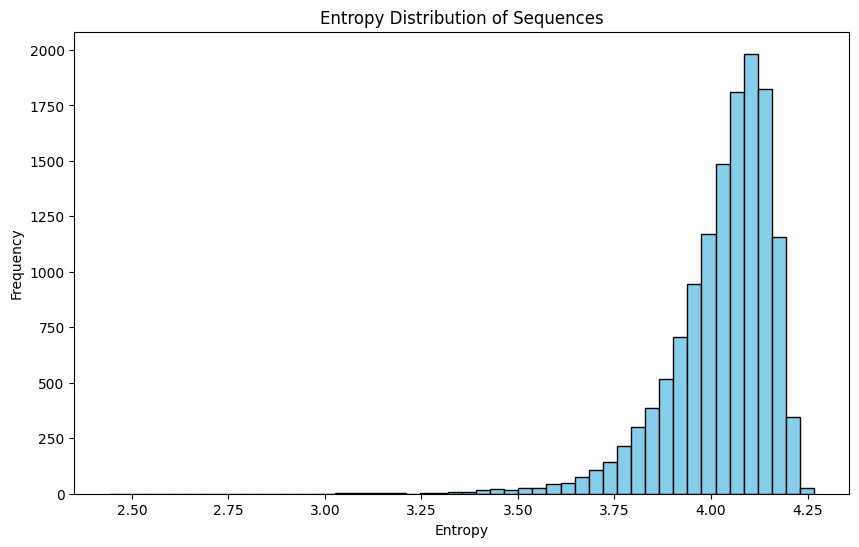

Minimum Entropy Value: 2.442


In [ ]:
#Please run all relevant code chunks that precede this one first

#Reading in the data
test_sequences, test_labels = load_fasta_data("Test.fasta")

#Dropping missing values and standardizing case
test_sequences,test_labels=drop_missing_values(test_sequences,test_labels)
test_sequences,test_labels=standardize_case(test_sequences,test_labels)

#Filtering based on length of sequence, character validity and dropping duplicates
test_sequences,test_labels=filter_sequences(test_sequences,test_labels)
test_sequences,test_labels=remove_non(test_sequences,test_labels)
test_sequences, test_labels = remove_duplicates(test_sequences,test_labels)

#Printing distribution information to check ratio
test_distribution_info = check_label_distribution(test_sequences, test_labels)


#Checking for Low complexity regions
test_min_entropy = analyze_low_complexity_sequences(test_sequences)
"""
Once again, there is no need for filtering out low complexity regions since they aren't present [Min. entropy=2.442]
"""
#Fasttext embeddings for the test data
test_sequences_tokenized = [list(seq) for seq in test_sequences]
test_fasttext_features = np.array([get_fasttext_embedding(seq, fasttext_model) for seq in test_sequences_tokenized])
#Scaling the test data
test_sequences_scaled=scaler_transform(test_fasttext_features)
#Now the test data is cleaned and stored in test_sequences_scaled and test_labels
#SMOTE has not been applied to the test data

# Model 1:

First, we fit and observe the performance metrics of multiple models to decide which would generate the best metrics of specificity, sensitivity and MCC score.

Upon observing the individual models, it is noted that not any one can be used on its own, hence bringing in the motivation for using stack ensemble approach.

All models explored: Naive Bayes, KNN, Random Forest, Gradient Boosting, Linear SVC, Logistic Regression

Base models: Random Forest, Gradient Boost and K-Nearest Neighbours

Meta model: Logistic Regression

In [ ]:
# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [ ]:
# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    # Confusion matrix for sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return {
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "F1 Score": f1,
        "Accuracy": accuracy
    }

In [ ]:
"""
##Base for features using spectrum kernel vector

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, recall_score, precision_score, classification_report

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrum_sequences_scaled_balanced, spectrum_labels_balanced, test_size=0.2, random_state=42)
"""

In [ ]:
##Base for features using fasttext
#If you wish to see performance using spectrum kernel vector approach, do not run this chunk


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fasttext_sequences_scaled_balanced, fasttext_labels_balanced, test_size=0.2, random_state=42)

In [ ]:
# Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_metrics = calculate_metrics(y_test, nb_pred)
print("Naive Bayes Metrics:", nb_metrics)

Naive Bayes Metrics: {'Sensitivity (Recall)': 0.789907604832978, 'Specificity': 0.5246177584513957, 'MCC': 0.3260134717013921, 'F1 Score': 0.6954508478818597, 'Accuracy': 0.6563823778593617}


In [ ]:
# Random Forest

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_metrics = calculate_metrics(y_test, random_forest_pred)
print("Random Forest Metrics:", random_forest_metrics)

Random Forest Metrics: {'Sensitivity (Recall)': 0.8129353233830846, 'Specificity': 0.7890307195960162, 'MCC': 0.6020721269518394, 'F1 Score': 0.8022162996212653, 'Accuracy': 0.8009036995199096}


In [ ]:
# KNN Classifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = calculate_metrics(y_test, knn_pred)
print("KNN Metrics:", knn_metrics)

KNN Metrics: {'Sensitivity (Recall)': 0.8932480454868514, 'Specificity': 0.5480432038154018, 'MCC': 0.4696485942455549, 'F1 Score': 0.759808959555045, 'Accuracy': 0.71950014120305}


In [ ]:
# Logistic Regression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_metrics = calculate_metrics(y_test, logreg_pred)
print("Logistic Regression Metrics:", logreg_metrics)

Logistic Regression Metrics: {'Sensitivity (Recall)': 0.6442075337597726, 'Specificity': 0.6322064805723103, 'MCC': 0.2764222130064604, 'F1 Score': 0.6388047078722955, 'Accuracy': 0.6381671844111833}


In [ ]:
# Gradient Boosting Classifier

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    max_features="sqrt",
    subsample=0.8,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_metrics = calculate_metrics(y_test, gb_pred)
print("Gradient Boosting Metrics:", gb_metrics)

Gradient Boosting Metrics: {'Sensitivity (Recall)': 0.7383084577114428, 'Specificity': 0.6564735587038856, 'MCC': 0.3960177840291193, 'F1 Score': 0.7077258482082027, 'Accuracy': 0.697119457780288}


In [ ]:
#Support Vector Machine

svm_model = LinearSVC(random_state=42,max_iter=10000)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_metrics =calculate_metrics(y_test,svm_pred)
print("SVM Metrics:", svm_metrics)

SVM Metrics: {'Sensitivity (Recall)': 0.6515991471215352, 'Specificity': 0.6295413101416748, 'MCC': 0.2811915952880853, 'F1 Score': 0.6429172510518935, 'Accuracy': 0.6404970347359503}



####Mean MCC while using Spectrum Kernel Vectors: 0.3016

####Mean MCC while uing Fasttext features: 0.3982
Based on the comparison between spectrum vector features and fasttext features, the models used produce better performance with the fasttext features. Therefore, they will be used going forward for the models.

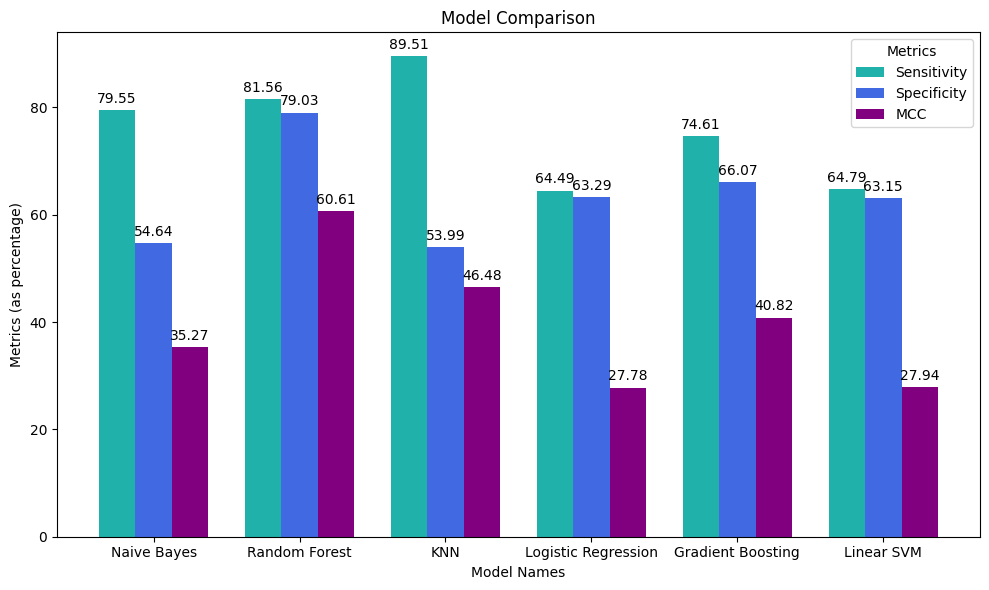

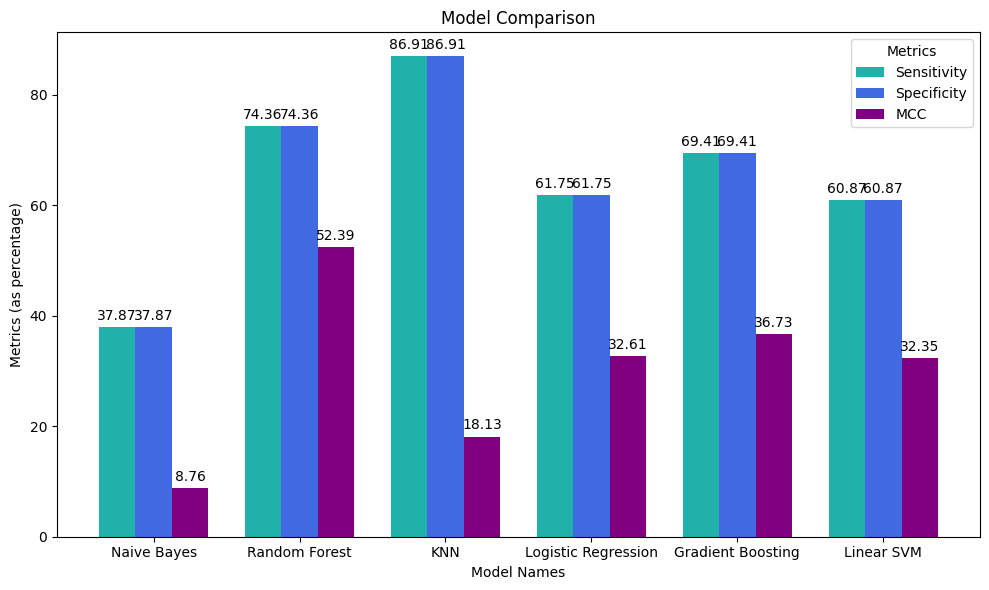

39.81666666666666
30.161666666666665


In [ ]:
# Visualization of performance of individual models

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
model_names = ['Naive Bayes', 'Random Forest', 'KNN', 'Logistic Regression', 'Gradient Boosting', 'Linear SVM']
fasttext_sensitivity=[79.55, 81.56, 89.51, 64.49, 74.61, 64.79]
fasttext_specificity=[54.64, 79.03, 53.99, 63.29, 66.07,63.15]
fasttext_mcc=[35.27, 60.61, 46.48, 27.78, 40.82, 27.94]

spectrum_sensitivity=[37.87, 74.36, 86.91, 61.75, 69.41, 60.87]
spectrum_specificity=[70.42, 77.99, 27.72, 70.73, 67.32,71.30]
spectrum_mcc=[8.76, 52.39, 18.13, 32.61, 36.73, 32.35]

def generate(sensitivity, specificity, mcc):
  data =pd.DataFrame({'Model Names': model_names,'Sensitivity': sensitivity,'Specificity': specificity,'MCC': mcc})
  # Plot setup
  fig, ax = plt.subplots(figsize=(10, 6))
  bar_width = 0.25
  x = np.arange(len(model_names))

  # Plotting bars
  bars1 = ax.bar(x - bar_width, sensitivity, bar_width, label='Sensitivity', color="lightseagreen")
  bars2 = ax.bar(x, specificity, bar_width, label='Specificity', color="royalblue")
  bars3 = ax.bar(x + bar_width, mcc, bar_width, label='MCC', color="purple")

  # Adding value labels on top of each bar
  for bars in [bars1, bars2, bars3]:
      for bar in bars:
          height = bar.get_height()
          ax.annotate(f'{height:.2f}',  # format to 2 decimal places
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # offset text position
                      textcoords="offset points",
                      ha='center', va='bottom')

  # Labels and title
  ax.set_xlabel('Model Names')
  ax.set_ylabel('Metrics (as percentage)')
  ax.set_title('Model Comparison')
  ax.set_xticks(x)
  ax.set_xticklabels(model_names)
  ax.legend(title="Metrics")
  plt.tight_layout()
  plt.show()
  return(np.mean(mcc))

mean_mcc1=generate(fasttext_sensitivity,fasttext_specificity, fasttext_mcc)
mean_mcc2=generate(spectrum_sensitivity,spectrum_sensitivity,spectrum_mcc)
print(mean_mcc1)
print(mean_mcc2)


In [ ]:
#stacking based on output metrics for individual models
#base models: knn(to improve recall), randomforest(balanced performance across all metrics) and gradient boosting(adds diversity and has high recall)
#meta model: logistic regression(simple but effective as a combiner)


base_models = [
    ('gb', gb_model), #diversity
    ('rf', random_forest_model), #balanced performance
    ('knn',knn_model) #recall focussed
]

# Meta model (Logistic Regression)
meta_model = logreg_model

# Stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)#3 instead of 5 to make the run more efficient

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Predict on test set
y_pred = stacked_model.predict(X_test)

stacked_metrics= calculate_metrics(y_test, y_pred)
print("Stacked Model Metrics:", stacked_metrics)

Stacked Model Metrics: {'Sensitivity (Recall)': 0.8063965884861407, 'Specificity': 0.826062561369056, 'MCC': 0.6326253741643789, 'F1 Score': 0.81344995698308, 'Accuracy': 0.8162948319683705}


The stacked model shows better performance than the individual base models. However, it has only been trained on 80% of the training data. Therefore, we will also train it on the entire training data, but first, we will perform hyperparameter tuning using random search to find the best hyperparameters.

In [ ]:
#Hyperparameter tuning using Randomized Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint

# Define parameter distributions
param_dist = {
    'rf__n_estimators': randint(50, 100),
    'rf__max_depth': [None, 5],
    'knn__n_neighbors': randint(3,5),
    'gb__n_estimators': randint(30, 60),
    'gb__learning_rate': uniform(0.1, 0.25),
    'final_estimator__C': uniform(0.1, 10)
}

# RandomizedSearchCV on the stacked model
random_search = RandomizedSearchCV(
    stacked_model,
    param_distributions=param_dist,
    n_iter=10,                # Run 20 different parameter combinations
    cv=2,                     # 3-fold cross-validation for efficiency
    scoring='accuracy',       # Adjust scoring as needed
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Fit the random search
random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predictions and performance evaluation
y_pred = best_model.predict(X_test)
print(f"Best Hyperparameters: {best_params}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'final_estimator__C': 6.2165316048828085, 'gb__learning_rate': 0.10176657630492936, 'gb__n_estimators': 54, 'knn__n_neighbors': 3, 'rf__max_depth': None, 'rf__n_estimators': 91}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      7129
           1       0.81      0.80      0.81      7035

    accuracy                           0.81     14164
   macro avg       0.81      0.81      0.81     14164
weighted avg       0.81      0.81      0.81     14164



In [ ]:
# Stacked model using best hyperparameters and 100% of the train.fasta data

entire_random_forest_model = RandomForestClassifier(n_estimators=91, random_state=42)
entire_random_forest_model.fit(fasttext_sequences_scaled_balanced, fasttext_labels_balanced)

entire_knn_model = KNeighborsClassifier(n_neighbors=3)
entire_knn_model.fit(fasttext_sequences_scaled_balanced, fasttext_labels_balanced)

entire_gb_model = GradientBoostingClassifier(
    n_estimators=54,        # Fewer trees
    learning_rate=0.10176657630492936,      # Higher learning rate
    max_depth=3,            # Limit tree depth
    max_features="sqrt",    # Limit features per split
    subsample=0.8,          # Use subsampling
    validation_fraction=0.1,
    n_iter_no_change=10,    # Early stopping
    random_state=42
)
entire_gb_model.fit(fasttext_sequences_scaled_balanced, fasttext_labels_balanced)

entire_logreg_model = LogisticRegression(max_iter=1000)
entire_logreg_model.fit(fasttext_sequences_scaled_balanced, fasttext_labels_balanced)

entire_base_models = [
    ('gb', entire_gb_model), #diversity
    ('rf', entire_random_forest_model), #balanced performance
    ('knn',entire_knn_model) #recall focussed
]

entire_meta_model = entire_logreg_model

# Stacking classifier
entire_stacked_model = StackingClassifier(estimators=entire_base_models, final_estimator=entire_meta_model, cv=3)#3 instead of 5 to make the run more efficient

# Fit the stacked model
entire_stacked_model.fit(fasttext_sequences_scaled_balanced,fasttext_labels_balanced)

StackingClassifier(cv=3,
                   estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.10176657630492936,
                                                           max_features='sqrt',
                                                           n_estimators=54,
                                                           n_iter_no_change=10,
                                                           random_state=42,
                                                           subsample=0.8)),
                               ('rf',
                                RandomForestClassifier(n_estimators=91,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
# predictions for test.fasta based on stacked model

y_test_pred = entire_stacked_model.predict(test_sequences_scaled)
entire_stacked_metrics = calculate_metrics(test_labels, y_test_pred)
print("Stacked Model Metrics on Test Data:", entire_stacked_metrics)

Stacked Model Metrics on Test Data: {'Sensitivity (Recall)': 0.45523724261414505, 'Specificity': 0.8484679665738162, 'MCC': 0.32931287449430763, 'F1 Score': 0.5174255914525566, 'Accuracy': 0.717771330804136}


Stacked Model Metrics on Test Data: {'Sensitivity (Recall)': 0.4601611459265891, 'Specificity': 0.8472423398328691, 'MCC': 0.33226025076939825, 'F1 Score': 0.5208359721342621, 'Accuracy': 0.7185896005355947}

#Model 2:
Recurrent Neural Network

In [ ]:
# importing required libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# function to create the RNN model

def create_model(units, activation, dropout_rate, input_shape):
    model = Sequential()

    model.add(Bidirectional(LSTM(units, activation=activation, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.0001))))
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(units, activation=activation, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.0001))))
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(units, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(0.0001))))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Nadam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:

X = np.array(fasttext_sequences_scaled_balanced)
y = np.array(fasttext_labels_balanced)

# Reshape the input to be 3D for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter ranges
lstm_units = [50, 100, 150]
activation_functions = ['tanh', 'relu']
dropout_rates = [0.2, 0.25, 0.3]

# Placeholder to store metrics in the form (units, activation, dropout_rate, sensitivity, specificity, mcc)
metrics_list = []

# Initialize variables to store the best model and best metrics
best_MCC_score = -1  # worst possible score
best_sensitivity=0
best_specificity=0

In [ ]:
# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    # Confusion matrix for sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)  # True Negative Rate
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return {
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "F1 Score": f1,
        "Accuracy": accuracy
    }

In [ ]:
# function to run the RNN

def run_model(units, activation, dropout_rate):
    global best_MCC_score, best_sensitivity,best_specificity
    print(f"Training with {units} LSTM units, {activation} activation, and {dropout_rate} dropout...")

    # Create and compile the model
    model = create_model(units, activation, dropout_rate, input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate sensitivity, specificity, and MCC
    sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)

    # Append the results to the metrics list
    metrics_list.append((units, activation, dropout_rate, sensitivity, specificity, mcc))

    # Check if this is the best MCC score so far
    if mcc > best_MCC_score:
        best_sensitivity=sensitivity
        best_specificity=specificity
        best_MCC_score = mcc

    print(f"Sensitivity: {sensitivity}, Specificity: {specificity}, MCC: {mcc}")

In [ ]:
#52m to execute
for activation in activation_functions:
    for dropout_rate in dropout_rates:
        run_model(50, activation, dropout_rate)

Training with 50 LSTM units, tanh activation, and 0.2 dropout...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.6622 - loss: 0.6621 - val_accuracy: 0.7052 - val_loss: 0.5888
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7061 - loss: 0.5907 - val_accuracy: 0.7099 - val_loss: 0.5773
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7130 - loss: 0.5762 - val_accuracy: 0.7158 - val_loss: 0.5687
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7154 - loss: 0.5709 - val_accuracy: 0.7217 - val_loss: 0.5613
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7148 - loss: 0.5711 - val_accuracy: 0.7217 - val_loss: 0.5623
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7194 - loss: 0.5642 - val_accuracy: 0.7255 - val_loss: 0.5575
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7222 - loss: 0.5605 - val_accuracy: 0.7230 - val_loss: 0.5552
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7238 - loss: 0.5584 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.6616 - loss: 0.6641 - val_accuracy: 0.7029 - val_loss: 0.5923
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7021 - loss: 0.5919 - val_accuracy: 0.7130 - val_loss: 0.5788
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7074 - loss: 0.5830 - val_accuracy: 0.7155 - val_loss: 0.5712
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7133 - loss: 0.5742 - val_accuracy: 0.7198 - val_loss: 0.5657
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7151 - loss: 0.5700 - val_accuracy: 0.7188 - val_loss: 0.5644
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7207 - loss: 0.5644 - val_accuracy: 0.7199 - val_loss: 0.5593
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7225 - loss: 0.5625 - val_accuracy: 0.7254 - val_loss: 0.5558
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7206 - loss: 0.5612 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6609 - loss: 0.6655 - val_accuracy: 0.7038 - val_loss: 0.5934
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6998 - loss: 0.5945 - val_accuracy: 0.7067 - val_loss: 0.5810
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7061 - loss: 0.5829 - val_accuracy: 0.7144 - val_loss: 0.5693
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7104 - loss: 0.5759 - val_accuracy: 0.7168 - val_loss: 0.5652
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7106 - loss: 0.5750 - val_accuracy: 0.7213 - val_loss: 0.5602
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7174 - loss: 0.5699 - val_accuracy: 0.7221 - val_loss: 0.5580
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7187 - loss: 0.5657 - val_accuracy: 0.7207 - val_loss: 0.5584
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7201 - loss: 0.5632 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6453 - loss: 0.6728 - val_accuracy: 0.6993 - val_loss: 0.5943
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7028 - loss: 0.5929 - val_accuracy: 0.7089 - val_loss: 0.5803
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7087 - loss: 0.5826 - val_accuracy: 0.7164 - val_loss: 0.5685
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7145 - loss: 0.5713 - val_accuracy: 0.7183 - val_loss: 0.5636
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7156 - loss: 0.5681 - val_accuracy: 0.7236 - val_loss: 0.5569
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7219 - loss: 0.5633 - val_accuracy: 0.7257 - val_loss: 0.5541
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7229 - loss: 0.5598 - val_accuracy: 0.7255 - val_loss: 0.5534
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7266 - loss: 0.5549 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6447 - loss: 0.6745 - val_accuracy: 0.7017 - val_loss: 0.5973
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7005 - loss: 0.5972 - val_accuracy: 0.7074 - val_loss: 0.5814
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7046 - loss: 0.5873 - val_accuracy: 0.7155 - val_loss: 0.5709
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7110 - loss: 0.5756 - val_accuracy: 0.7218 - val_loss: 0.5637
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7125 - loss: 0.5707 - val_accuracy: 0.7199 - val_loss: 0.5635
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7202 - loss: 0.5674 - val_accuracy: 0.7277 - val_loss: 0.5580
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.7193 - loss: 0.5620 - val_accuracy: 0.7283 - val_loss: 0.5566
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7178 - loss: 0.5639 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6512 - loss: 0.6753 - val_accuracy: 0.6948 - val_loss: 0.6003
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6904 - loss: 0.6030 - val_accuracy: 0.7084 - val_loss: 0.5812
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7028 - loss: 0.5893 - val_accuracy: 0.7154 - val_loss: 0.5733
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7108 - loss: 0.5778 - val_accuracy: 0.7137 - val_loss: 0.5682
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7063 - loss: 0.5798 - val_accuracy: 0.7201 - val_loss: 0.5635
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7114 - loss: 0.5739 - val_accuracy: 0.7218 - val_loss: 0.5632
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7189 - loss: 0.5671 - val_accuracy: 0.7238 - val_loss: 0.5594
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7173 - loss: 0.5669 - val_accurac

In [ ]:
#105m to execute
for activation in activation_functions:
    for dropout_rate in dropout_rates:
        run_model(100, activation, dropout_rate)

Training with 100 LSTM units, tanh activation, and 0.2 dropout...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.6678 - loss: 0.6700 - val_accuracy: 0.7048 - val_loss: 0.5925
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.7014 - loss: 0.5911 - val_accuracy: 0.7120 - val_loss: 0.5767
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.7124 - loss: 0.5771 - val_accuracy: 0.7161 - val_loss: 0.5701
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.7120 - loss: 0.5697 - val_accuracy: 0.7190 - val_loss: 0.5644
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.7175 - loss: 0.5660 - val_accuracy: 0.7226 - val_loss: 0.5601
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7202 - loss: 0.5646 - val_accuracy: 0.7255 - val_loss: 0.5568
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7214 - loss: 0.5599 - val_accuracy: 0.7218 - val_loss: 0.5581
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7278 - loss: 0.5545 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6690 - loss: 0.6732 - val_accuracy: 0.7017 - val_loss: 0.5914
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.7046 - loss: 0.5914 - val_accuracy: 0.7100 - val_loss: 0.5796
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.7091 - loss: 0.5799 - val_accuracy: 0.7113 - val_loss: 0.5774
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7114 - loss: 0.5766 - val_accuracy: 0.7182 - val_loss: 0.5637
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.7130 - loss: 0.5725 - val_accuracy: 0.7184 - val_loss: 0.5666
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7204 - loss: 0.5669 - val_accuracy: 0.7255 - val_loss: 0.5571
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.7227 - loss: 0.5610 - val_accuracy: 0.7207 - val_loss: 0.5584
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7220 - loss: 0.5603 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.6681 - loss: 0.6730 - val_accuracy: 0.6979 - val_loss: 0.5991
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.6985 - loss: 0.5956 - val_accuracy: 0.7053 - val_loss: 0.5815
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.7073 - loss: 0.5855 - val_accuracy: 0.7110 - val_loss: 0.5720
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.7102 - loss: 0.5777 - val_accuracy: 0.7166 - val_loss: 0.5666
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7114 - loss: 0.5740 - val_accuracy: 0.7203 - val_loss: 0.5624
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7159 - loss: 0.5702 - val_accuracy: 0.7206 - val_loss: 0.5607
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.7172 - loss: 0.5691 - val_accuracy: 0.7218 - val_loss: 0.5578
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7177 - loss: 0.5654 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.6692 - loss: 0.6779 - val_accuracy: 0.7073 - val_loss: 0.5913
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.7033 - loss: 0.5917 - val_accuracy: 0.7127 - val_loss: 0.5788
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7154 - loss: 0.5737 - val_accuracy: 0.7213 - val_loss: 0.5644
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.7170 - loss: 0.5674 - val_accuracy: 0.7243 - val_loss: 0.5582
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7200 - loss: 0.5632 - val_accuracy: 0.7262 - val_loss: 0.5542
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7231 - loss: 0.5605 - val_accuracy: 0.7276 - val_loss: 0.5522
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7289 - loss: 0.5536 - val_accuracy: 0.7265 - val_loss: 0.5531
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7274 - loss: 0.5525 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.6460 - loss: 0.6810 - val_accuracy: 0.7022 - val_loss: 0.5958
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7055 - loss: 0.5903 - val_accuracy: 0.7163 - val_loss: 0.5742
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.7095 - loss: 0.5805 - val_accuracy: 0.7202 - val_loss: 0.5657
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7172 - loss: 0.5679 - val_accuracy: 0.7240 - val_loss: 0.5588
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.7241 - loss: 0.5619 - val_accuracy: 0.7241 - val_loss: 0.5564
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.7218 - loss: 0.5618 - val_accuracy: 0.7300 - val_loss: 0.5524
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.7276 - loss: 0.5554 - val_accuracy: 0.7265 - val_loss: 0.5519
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.7275 - loss: 0.5541 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.6474 - loss: 0.6842 - val_accuracy: 0.7012 - val_loss: 0.5963
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.7010 - loss: 0.5958 - val_accuracy: 0.7110 - val_loss: 0.5793
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7109 - loss: 0.5796 - val_accuracy: 0.7167 - val_loss: 0.5689
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7120 - loss: 0.5745 - val_accuracy: 0.7225 - val_loss: 0.5606
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.7186 - loss: 0.5652 - val_accuracy: 0.7252 - val_loss: 0.5599
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.7155 - loss: 0.5680 - val_accuracy: 0.7238 - val_loss: 0.5567
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7212 - loss: 0.5609 - val_accuracy: 0.7238 - val_loss: 0.5560
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7238 - loss: 0.5596 - val_accurac

In [ ]:
for activation in activation_functions:
    for dropout_rate in dropout_rates:
        run_model(150, activation, dropout_rate)

Training with 150 LSTM units, tanh activation, and 0.2 dropout...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 55s 49ms/step - accuracy: 0.6730 - loss: 0.6806 - val_accuracy: 0.7010 - val_loss: 0.5934
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7052 - loss: 0.5920 - val_accuracy: 0.7055 - val_loss: 0.5808
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7097 - loss: 0.5794 - val_accuracy: 0.7125 - val_loss: 0.5779
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7127 - loss: 0.5736 - val_accuracy: 0.7210 - val_loss: 0.5658
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7150 - loss: 0.5726 - val_accuracy: 0.7189 - val_loss: 0.5629
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.7168 - loss: 0.5640 - val_accuracy: 0.7201 - val_loss: 0.5597
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7212 - loss: 0.5615 - val_accuracy: 0.7230 - val_loss: 0.5554
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7179 - loss: 0.5628 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 59s 52ms/step - accuracy: 0.6677 - loss: 0.6849 - val_accuracy: 0.7031 - val_loss: 0.5921
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7021 - loss: 0.5926 - val_accuracy: 0.7084 - val_loss: 0.5780
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7096 - loss: 0.5782 - val_accuracy: 0.7189 - val_loss: 0.5680
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7087 - loss: 0.5770 - val_accuracy: 0.7177 - val_loss: 0.5683
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7154 - loss: 0.5695 - val_accuracy: 0.7182 - val_loss: 0.5639
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7122 - loss: 0.5691 - val_accuracy: 0.7226 - val_loss: 0.5603
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7194 - loss: 0.5621 - val_accuracy: 0.7204 - val_loss: 0.5607
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7188 - loss: 0.5623 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.6698 - loss: 0.6844 - val_accuracy: 0.6948 - val_loss: 0.5992
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.7033 - loss: 0.5944 - val_accuracy: 0.7029 - val_loss: 0.5831
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7060 - loss: 0.5831 - val_accuracy: 0.7143 - val_loss: 0.5724
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7105 - loss: 0.5758 - val_accuracy: 0.7139 - val_loss: 0.5717
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.7132 - loss: 0.5731 - val_accuracy: 0.7134 - val_loss: 0.5699
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.7140 - loss: 0.5685 - val_accuracy: 0.7170 - val_loss: 0.5658
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.7147 - loss: 0.5671 - val_accuracy: 0.7226 - val_loss: 0.5592
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7190 - loss: 0.5646 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 65s 50ms/step - accuracy: 0.6613 - loss: 0.6831 - val_accuracy: 0.7073 - val_loss: 0.5914
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.7052 - loss: 0.5909 - val_accuracy: 0.7162 - val_loss: 0.5728
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7117 - loss: 0.5756 - val_accuracy: 0.7143 - val_loss: 0.5720
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.7167 - loss: 0.5664 - val_accuracy: 0.7255 - val_loss: 0.5583
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.7215 - loss: 0.5616 - val_accuracy: 0.7206 - val_loss: 0.5575
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7247 - loss: 0.5588 - val_accuracy: 0.7250 - val_loss: 0.5526
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7293 - loss: 0.5528 - val_accuracy: 0.7251 - val_loss: 0.5518
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7283 - loss: 0.5510 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 57s 51ms/step - accuracy: 0.6648 - loss: 0.6858 - val_accuracy: 0.7075 - val_loss: 0.5888
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.7084 - loss: 0.5876 - val_accuracy: 0.7185 - val_loss: 0.5716
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7125 - loss: 0.5764 - val_accuracy: 0.7209 - val_loss: 0.5636
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7152 - loss: 0.5701 - val_accuracy: 0.7231 - val_loss: 0.5608
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7194 - loss: 0.5638 - val_accuracy: 0.7215 - val_loss: 0.5585
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.7221 - loss: 0.5594 - val_accuracy: 0.7266 - val_loss: 0.5540
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.7231 - loss: 0.5579 - val_accuracy: 0.7247 - val_loss: 0.5522
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7283 - loss: 0.5542 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


886/886 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.6649 - loss: 0.6851 - val_accuracy: 0.7108 - val_loss: 0.5906
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.7027 - loss: 0.5925 - val_accuracy: 0.7164 - val_loss: 0.5727
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7119 - loss: 0.5796 - val_accuracy: 0.7152 - val_loss: 0.5681
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.7175 - loss: 0.5711 - val_accuracy: 0.7157 - val_loss: 0.5714
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.7197 - loss: 0.5676 - val_accuracy: 0.7270 - val_loss: 0.5562
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.7205 - loss: 0.5641 - val_accuracy: 0.7242 - val_loss: 0.5563
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.7283 - loss: 0.5567 - val_accuracy: 0.7247 - val_loss: 0.5519
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.7256 - loss: 0.5584 - val_accurac

In [ ]:
for entry in metrics_list:
    print(f"LSTM Units: {entry[0]}, Activation: {entry[1]}, Dropout: {entry[2]} => Sensitivity: {entry[3]}, Specificity: {entry[4]}, MCC: {entry[5]}")

print(f"Best MCC Score: {best_MCC_score}")

LSTM Units: 50, Activation: tanh, Dropout: 0.2 => Sensitivity: 0.7449530850156383, Specificity: 0.7294760437097226, MCC: 0.4744504899565323
LSTM Units: 50, Activation: tanh, Dropout: 0.2 => Sensitivity: 0.7419675860108047, Specificity: 0.727794900532362, MCC: 0.4697768583234967
LSTM Units: 50, Activation: tanh, Dropout: 0.25 => Sensitivity: 0.754193915268695, Specificity: 0.7125245166713365, MCC: 0.46704755012411436
LSTM Units: 50, Activation: tanh, Dropout: 0.3 => Sensitivity: 0.7452374182541939, Specificity: 0.7237321378537406, MCC: 0.4690334575417216
LSTM Units: 50, Activation: relu, Dropout: 0.2 => Sensitivity: 0.7436735854421382, Specificity: 0.7213505183524797, MCC: 0.4650947505655876
LSTM Units: 50, Activation: relu, Dropout: 0.25 => Sensitivity: 0.7331532556155814, Specificity: 0.7345194732418044, MCC: 0.46766551954147423
LSTM Units: 50, Activation: relu, Dropout: 0.3 => Sensitivity: 0.7290304236565255, Specificity: 0.736060521154385, MCC: 0.4651037840767185
LSTM Units: 100, Ac

Based on the above results, the best model has the following features:
1. LSTM units: 150
2. Activation: relu
3. Dropout: 0.25

In [ ]:
#Creating the best model to train over the entire training data set

X = np.array(fasttext_sequences_scaled_balanced)
y = np.array(fasttext_labels_balanced)

# Reshape the input to be 3D for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

best_model = create_model(units=150, activation='relu', dropout_rate=0.25, input_shape=(X_train.shape[1], X_train.shape[2]))

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_history = best_model.fit(X, y, epochs=30, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.6561 - loss: 0.6768 - val_accuracy: 0.6966 - val_loss: 0.6149
Epoch 2/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7051 - loss: 0.5845 - val_accuracy: 0.6286 - val_loss: 0.6947
Epoch 3/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7124 - loss: 0.5733 - val_accuracy: 0.7028 - val_loss: 0.5852
Epoch 4/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7169 - loss: 0.5660 - val_accuracy: 0.7283 - val_loss: 0.5692
Epoch 5/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7190 - loss: 0.5632 - val_accuracy: 0.7251 - val_loss: 0.5798
Epoch 6/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7259 - loss: 0.5561 - val_accuracy: 0.7499 - val_loss: 0.5233
Epoch 7/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7211 - loss: 0.5574 - val_accuracy: 0.6810 - val_loss: 0.5982
Epoch 8/30
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7268 - loss: 0.5536 - val_accuracy: 

In [ ]:
#To predict for the test data
X_test=np.array(test_sequences_scaled)
X_test=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))


y_test_pred_RNN = best_model.predict(X_test)
binary_predictions = (y_test_pred_RNN > 0.5).astype(int)
calculate_metrics(test_labels, binary_predictions)
#print(f"Sensitivity: {sensitivity}, Specificity: {specificity}, MCC: {mcc}, F1 Score: {f1}, Accuracy: {accuracy}")

421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


{'Sensitivity (Recall)': 0.6448075201432408,
 'Specificity': 0.7458495821727019,
 'MCC': 0.3783721326160624,
 'F1 Score': 0.5983385254413291,
 'Accuracy': 0.7122666071561408}

RNN metrics on Test Data

{'Sensitivity (Recall)': 0.6342882721575649,
 'Specificity': 0.7634540389972145,
 'MCC': 0.38834223936791373,
 'F1 Score': 0.6013793103448276,
 'Accuracy': 0.7205236926281336}

In [ ]:
def plot_best_model_history(best_history):
    plt.figure(figsize=(10, 6))

    # Extract values from history
    accuracy = best_history.history['accuracy']
    val_accuracy = best_history.history['val_accuracy']
    loss = best_history.history['loss']
    val_loss = best_history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Plot all lines on the same graph
    plt.plot(epochs, accuracy, label='Training Accuracy',color='blue')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy',color='green')
    plt.plot(epochs, loss, label='Training Loss',color='yellow')
    plt.plot(epochs, val_loss, label='Validation Loss',color='red')

    # Adding labels and title
    plt.title('Best Model: Training & Validation Loss and Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
#For initial testing, not applicable to best model

def plot_metrics_over_models(metrics_list):
    plt.figure(figsize=(10, 6))

    # Extract sensitivity, specificity, and MCC from metrics_list
    sensitivities = [entry[3] for entry in metrics_list]
    specificities = [entry[4] for entry in metrics_list]
    mccs = [entry[5] for entry in metrics_list]

    models = range(1, len(sensitivities) + 1)#model number to be plotted on the X axis

    # Plot lines
    plt.plot(models, sensitivities, label='Sensitivity',color='lightblue')
    plt.plot(models, specificities, label='Specificity',color='lightgreen')
    plt.plot(models, mccs, label='MCC',color='pink')

    # Find the maximum points
    max_sens = max(sensitivities)
    max_spec = max(specificities)
    max_mcc = max(mccs)

    max_sens_idx = sensitivities.index(max_sens) + 1
    max_spec_idx = specificities.index(max_spec) + 1
    max_mcc_idx = mccs.index(max_mcc) + 1

    # Mark the maximum points on the graph
    plt.scatter(max_sens_idx, max_sens, color='blue')
    plt.text(max_sens_idx, max_sens, f'Max Sens: {round(max_sens,2)}', fontsize=10)

    plt.scatter(max_spec_idx, max_spec, color='green')
    plt.text(max_spec_idx, max_spec, f'Max Spec: {round(max_spec,2)}', fontsize=10)

    plt.scatter(max_mcc_idx, max_mcc, color='red')
    plt.text(max_mcc_idx, max_mcc, f'Max MCC: {round(max_mcc,2)}', fontsize=10)

    # Adding labels and title
    plt.title('Sensitivity, Specificity, and MCC Across All Models')
    plt.xlabel('Model Index')
    plt.ylabel('Value')
    plt.legend()

    # Show the plot
    plt.show()

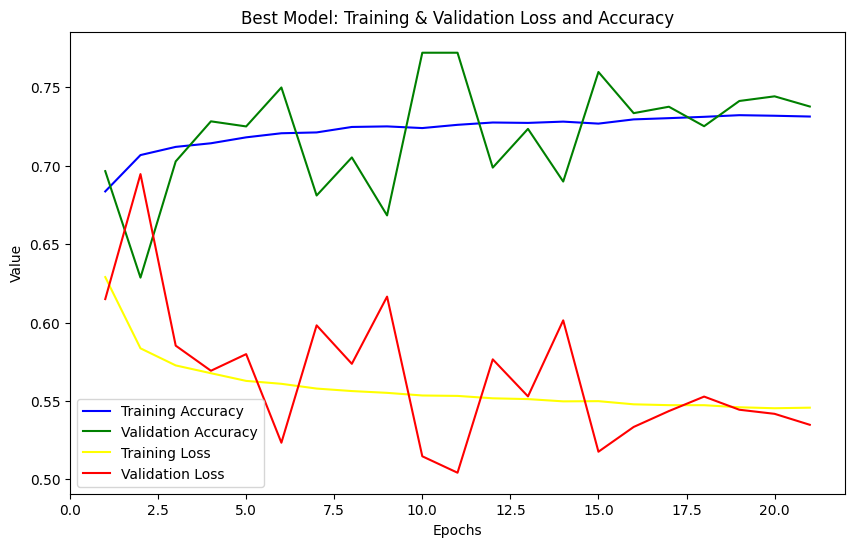

In [ ]:
plot_best_model_history(best_history)
#plot_metrics_over_models(metrics_list)

# Saving Models as pickle files for reusability

In [ ]:
# both models are saved into pickle files
import pickle as pkl

stacked_filename="entire_stacked_model.pkl"
rnn_filename="entire_rnn_model.pkl"

with open(stacked_filename, 'wb') as file:
    pkl.dump(entire_stacked_model, file)

with open(rnn_filename, 'wb') as file:
    pkl.dump(best_model, file)

In [ ]:
# code to load models from pickle files
# uncomment as and when needed
#filename="entire_stacked_model.pkl"
#filename="entire_rnn_model.pkl"
#with open(filename, 'rb') as file:
     #loaded_model = pkl.load(file)